<h2> Code to test each timestep displacement (sudo velocity) and then try to compute the VAF- Velocity auto correlation Function and then Fourier Transform. \n For individual simulations

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import colors,cm
from scipy import stats
import dispersion_utils as utils
from matplotlib.animation import FuncAnimation
from datetime import timedelta

In [4]:
home_folder = "/nethome/manra003/analysis/dispersion/simulations/"
output_folder = "/nethome/manra003/analysis/dispersion/outputs/animations/"
# ds1 = xr.open_zarr(home_folder + "Fwd_2D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")
# ds2 = xr.open_zarr(home_folder + "Fwd_3D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")  
# ds3 = xr.open_zarr(home_folder + "Fwd_DVM_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 

# ds1 = xr.open_zarr(home_folder + "08Aug2023_2D_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr")
# ds2 = xr.open_zarr(home_folder + "08Aug2023_3D_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr")  
# ds3 = xr.open_zarr(home_folder + "08Aug2023_DVM_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr") 
# # ds4 = xr.open_zarr(home_folder + "08Aug2023_3D_BP_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1025.zarr")  #1025.5, 2329 particle
# ds4 = xr.open_zarr(home_folder + "08Aug2023_3D_BP_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days_radius1mm_density1025.zarr") #1025.0, 2329 particle
# plot_particles_size=30
 
ds1 = xr.open_zarr(home_folder + "Fwd_2D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")
ds2 = xr.open_zarr(home_folder + "Fwd_3D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")  
# ds3 = xr.open_zarr(home_folder + "Fwd_DVM_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 
ds3 = xr.open_zarr(home_folder + "NewAug2023_DVM_BenguelaUpwR_1ov64_961x641res_Dec2017_1z_100days.zarr") 
ds4 = xr.open_zarr(home_folder + "Fwd_3D_BP_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 
plot_particles_size = 0.1


In [5]:
t_days = 100
p_total = len(ds1.lat[:])

disp_array_1 = np.empty((p_total, t_days-1))
disp_array_2 = np.empty((p_total, t_days-1))
disp_array_3 = np.empty((p_total, t_days-1))
disp_array_4 = np.empty((p_total, t_days-1))

disp_array_1[:] = np.nan
disp_array_2[:] = np.nan
disp_array_3[:] = np.nan
disp_array_4[:] = np.nan

<h4> computing displacement at time t1 with previous location at t0

In [6]:
for time_step in range(t_days-1):
    disp_array_1[:, time_step] = utils.distance(ds1['lon'][:, time_step+1], ds1['lat'][:, time_step+1], ds1['lon'][:, time_step], ds1['lat'][:, time_step])
    disp_array_2[:, time_step] = utils.distance(ds2['lon'][:, time_step+1], ds2['lat'][:, time_step+1], ds2['lon'][:, time_step], ds2['lat'][:, time_step])
    disp_array_3[:, time_step] = utils.distance(ds3['lon'][:, time_step+1], ds3['lat'][:, time_step+1], ds3['lon'][:, time_step], ds3['lat'][:, time_step])
    disp_array_4[:, time_step] = utils.distance(ds4['lon'][:, time_step+1], ds4['lat'][:, time_step+1], ds4['lon'][:, time_step], ds4['lat'][:, time_step])

In [13]:
vel_arrary_1 = disp_array_1/(24*3600)
np.nanmax(vel_arrary_1)
vel_arrary_2 = disp_array_2/(24*3600)
vel_arrary_3 = disp_array_3/(24*3600)
vel_arrary_4 = disp_array_4/(24*3600)



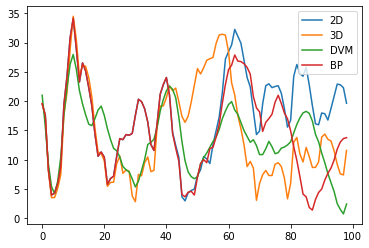

In [8]:
id=10000
plt.plot(disp_array_1[id,:], label = "2D")
plt.plot(disp_array_2[id,:], label = "3D")
plt.plot(disp_array_3[id,:], label = "DVM")
plt.plot(disp_array_4[id,:], label = "BP")
plt.legend()


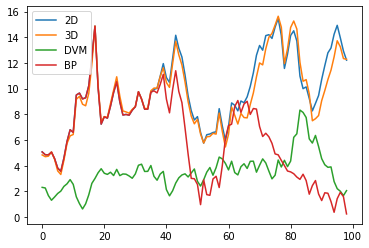

In [9]:
id=300000
plt.plot(disp_array_1[id,:], label = "2D")
plt.plot(disp_array_2[id,:], label = "3D")
plt.plot(disp_array_3[id,:], label = "DVM")
plt.plot(disp_array_4[id,:], label = "BP")
plt.legend()

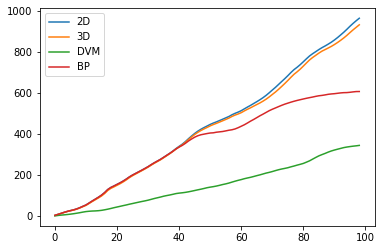

In [10]:
cum_sum_arra1= np.cumsum(disp_array_1, axis=1)
cum_sum_arra2= np.cumsum(disp_array_2, axis=1)
cum_sum_arra3= np.cumsum(disp_array_3, axis=1)
cum_sum_arra4= np.cumsum(disp_array_4, axis=1)

id=300000
plt.plot(cum_sum_arra1[id], label = "2D")
plt.plot(cum_sum_arra2[id], label = "3D")
plt.plot(cum_sum_arra3[id], label = "DVM")
plt.plot(cum_sum_arra4[id], label = "BP")
plt.legend()
# plt.plot(np.sum(disp_array_1, axis=1)[5000:10000], label = "2D")

In [47]:
def plot_mean_std(all_ac1,l):
    mean=np.nanmean(all_ac1, axis=0)
    std=np.nanstd(all_ac1,axis=0)
    plt.plot(mean, label=l)
    plt.fill_between(range(t_days-1), mean - std, mean + std, alpha=0.2)

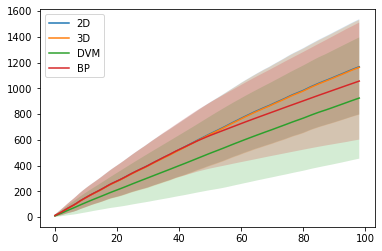

In [52]:
plot_mean_std(cum_sum_arra1, "2D")
plot_mean_std(cum_sum_arra2, "3D")
plot_mean_std(cum_sum_arra3, "DVM")
plot_mean_std(cum_sum_arra4, "BP")
plt.legend()

<h3> VAF 

In [26]:
def get_autocorr(array, id):
    mean= np.nanmean(array[id,])
    var = np.nanvar(array[id,])

    normd = array[id,] - mean

    # compute autocorrelation
    ac = np.correlate(normd,normd,'full')[len(normd)-1:] 
    ac = ac/var/len(normd)
    return ac

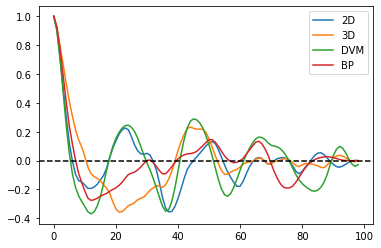

In [46]:
id=10000

plt.plot(get_autocorr(vel_arrary_1, id), label = "2D")
plt.plot(get_autocorr(vel_arrary_2, id), label = "3D")
plt.plot(get_autocorr(vel_arrary_3, id), label = "DVM")
plt.plot(get_autocorr(vel_arrary_4, id), label = "BP")
plt.axhline(y=0,linestyle='--', color="k")
plt.legend()


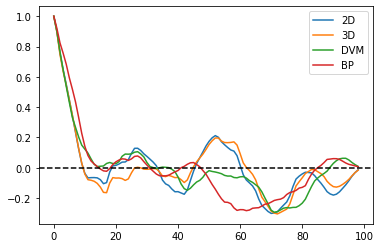

In [21]:
id=300000

plt.plot(get_autocorr(vel_arrary_1, id), label = "2D")
plt.plot(get_autocorr(vel_arrary_2, id), label = "3D")
plt.plot(get_autocorr(vel_arrary_3, id), label = "DVM")
plt.plot(get_autocorr(vel_arrary_4, id), label = "BP")
plt.axhline(y=0,linestyle='--', color="k")
plt.legend()


In [39]:
all_ac1 = np.empty((p_total, t_days-1))
all_ac2 = np.empty((p_total, t_days-1))
all_ac3 = np.empty((p_total, t_days-1))
all_ac4 = np.empty((p_total, t_days-1))

for i in range(p_total):
    all_ac1[i,:] = get_autocorr(vel_arrary_1, i)
    all_ac2[i,:] = get_autocorr(vel_arrary_2, i)
    all_ac3[i,:] = get_autocorr(vel_arrary_3, i)
    all_ac4[i,:] = get_autocorr(vel_arrary_4, i)


/tmp/ipykernel_274939/3376734062.py:9: RuntimeWarning: invalid value encountered in true_divide
  ac = ac/var/len(normd)


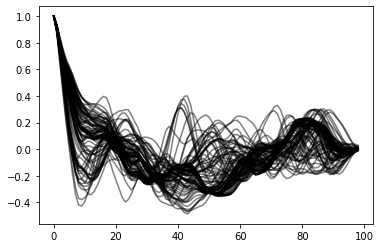

In [32]:
plt.plot(range(t_days-1), all_ac1[10000:10100].T, alpha=0.5, color='k')

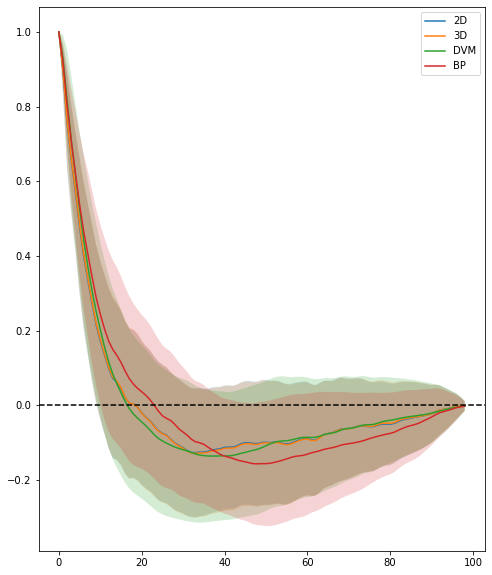

In [48]:
figure= plt.figure(figsize=(8,10))
plot_mean_std(all_ac1, "2D")
plot_mean_std(all_ac2, "3D")
plot_mean_std(all_ac3, "DVM")
plot_mean_std(all_ac4, "BP")
plt.axhline(y=0,linestyle='--', color="k")
plt.legend()

<h3>Fourier Transform